In [382]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
##Model selection Library
from sklearn import model_selection
##mlxtend  for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
##Naive Bayes 
from sklearn.naive_bayes import GaussianNB
##calculate accuracy measures & confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

### Q1 Read the input file and check the data dimension

In [383]:
#Read input file and understand the data
# "default" is my dependent variable

In [384]:
gercr_df = pd.read_csv("german_credit.csv")

In [385]:
gercr_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [386]:
gercr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [387]:
gercr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [388]:
gercr_df.shape 

(1000, 21)

In [389]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [390]:
# Create dummy variables for categorical columns
gercr_df_account_check_status = pd.get_dummies(gercr_df["account_check_status"])
gercr_df_credit_history  = pd.get_dummies(gercr_df["credit_history"])
gercr_df_purpose  = pd.get_dummies(gercr_df["purpose"])
gercr_df_savings  = pd.get_dummies(gercr_df["savings"])
gercr_df_present_emp_since  = pd.get_dummies(gercr_df["present_emp_since"])
gercr_df_personal_status_sex = pd.get_dummies(gercr_df["personal_status_sex"])
gercr_df_other_debtors = pd.get_dummies(gercr_df["other_debtors"])
gercr_df_property  = pd.get_dummies(gercr_df["property"])
gercr_df_other_installment_plans  = pd.get_dummies(gercr_df["other_installment_plans"])
gercr_df_housing  = pd.get_dummies(gercr_df["housing"])
gercr_df_job  = pd.get_dummies(gercr_df["job"])
gercr_df_telephone  = pd.get_dummies(gercr_df["telephone"])
gercr_df_foreign_worker  = pd.get_dummies(gercr_df["foreign_worker"])

#Concat new columns to original dataframe 
gercr_df_concat = pd.concat([gercr_df, gercr_df_account_check_status, gercr_df_credit_history,gercr_df_purpose,gercr_df_savings,gercr_df_present_emp_since,gercr_df_personal_status_sex,gercr_df_other_debtors,gercr_df_property,gercr_df_other_installment_plans,gercr_df_account_check_status,gercr_df_housing,gercr_df_job,gercr_df_telephone,gercr_df_foreign_worker], axis=1)
print (gercr_df_concat.head())

   default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/t

In [391]:
gercr_df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 79 columns):
default                                                             1000 non-null int64
account_check_status                                                1000 non-null object
duration_in_month                                                   1000 non-null int64
credit_history                                                      1000 non-null object
purpose                                                             1000 non-null object
credit_amount                                                       1000 non-null int64
savings                                                             1000 non-null object
present_emp_since                                                   1000 non-null object
installment_as_income_perc                                          1000 non-null int64
personal_status_sex                                                 1000 non-null object
other_de

In [392]:
gercr_df_concat.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,own,rent,management/ self-employed/ highly qualified employee/ officer,skilled employee / official,unemployed/ unskilled - non-resident,unskilled - resident,none,"yes, registered under the customers name",no,yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,1,0,0,1,0,0,0,1,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,1,0,0,1,0,0,1,0,0,1
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,1,0,0,0,0,1,1,0,0,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,0,0,0,1,0,0,1,0,0,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,0,0,0,1,0,0,1,0,0,1


In [393]:
gercr_df_concat.shape

(1000, 79)

### Check for highly correlated variables but don't required any treatment for this use case

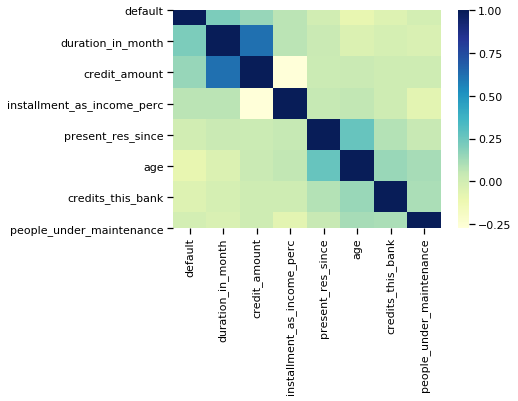

In [394]:
sns.heatmap(gercr_df.corr(),cmap="YlGnBu")

In [395]:
gercr_df.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


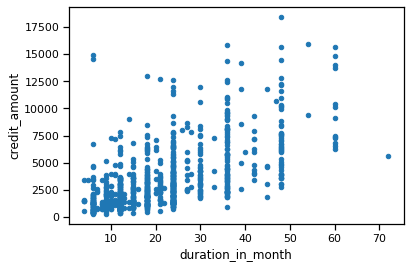

In [396]:
gercr_df.plot.scatter(x='duration_in_month', y='credit_amount')

### Drop the original variables which are converted to dummy

In [397]:
gercr_df_concat.drop(['credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','account_check_status','housing','job','telephone','foreign_worker'], inplace=True, axis=1)
print (gercr_df_concat.head())

   default  duration_in_month  credit_amount  installment_as_income_perc  \
0        0                  6           1169                           4   
1        1                 48           5951                           2   
2        0                 12           2096                           2   
3        0                 42           7882                           2   
4        1                 24           4870                           3   

   present_res_since  age  credits_this_bank  people_under_maintenance  \
0                  4   67                  2                         1   
1                  2   22                  1                         1   
2                  3   49                  1                         2   
3                  4   45                  1                         2   
4                  4   53                  2                         2   

   0 <= ... < 200 DM  < 0 DM  ...  own  rent  \
0                  0       1  ...    1     0   
1 

In [398]:
gercr_df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 66 columns):
default                                                             1000 non-null int64
duration_in_month                                                   1000 non-null int64
credit_amount                                                       1000 non-null int64
installment_as_income_perc                                          1000 non-null int64
present_res_since                                                   1000 non-null int64
age                                                                 1000 non-null int64
credits_this_bank                                                   1000 non-null int64
people_under_maintenance                                            1000 non-null int64
0 <= ... < 200 DM                                                   1000 non-null uint8
< 0 DM                                                              1000 non-null uint8
>= 200 DM / sa

In [399]:
gercr_df_concat.shape

(1000, 66)

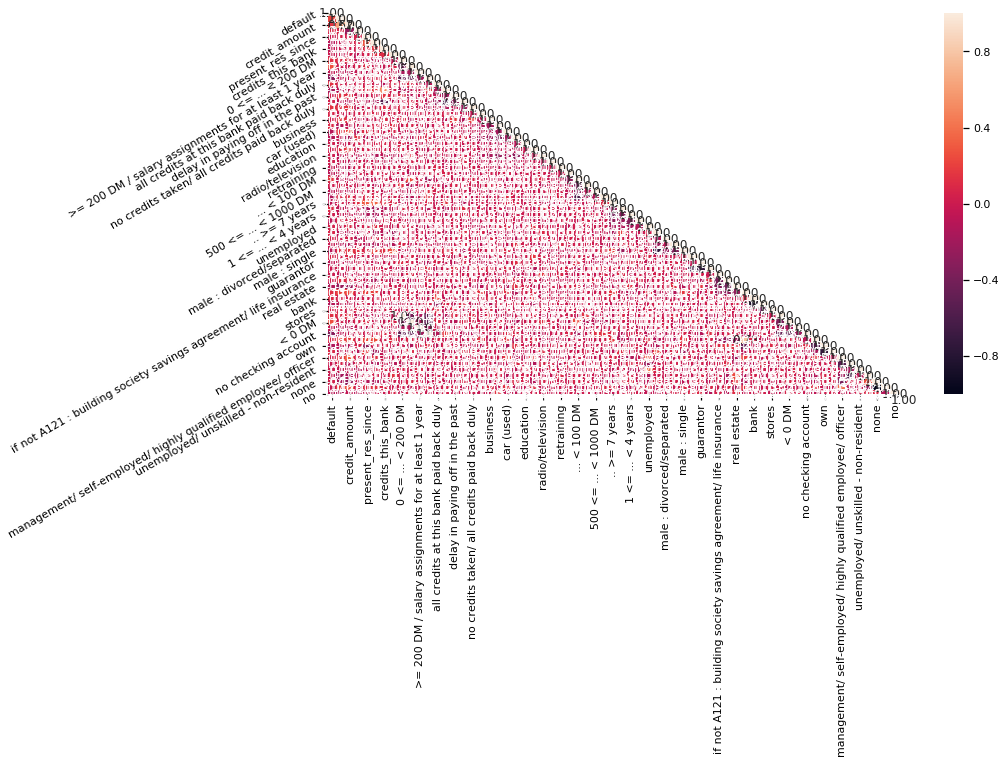

In [400]:
corr = gercr_df_concat.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

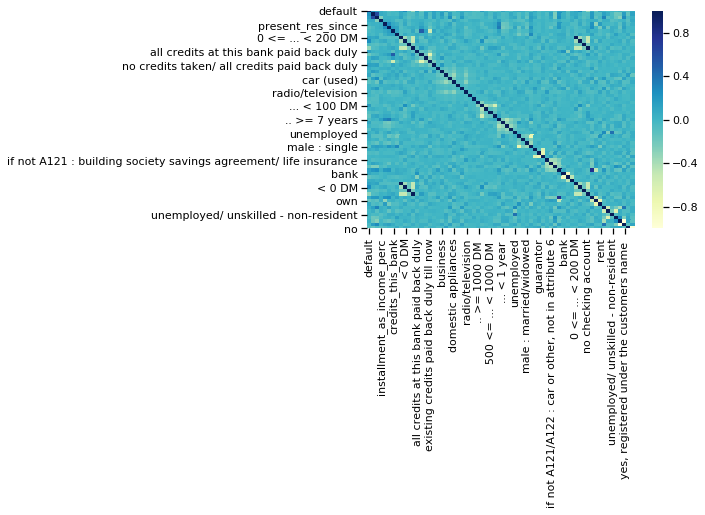

In [401]:
sns.heatmap(gercr_df_concat.corr(),cmap="YlGnBu")

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [402]:
feature_set=gercr_df_concat.drop('default',axis=1)
target_set=gercr_df_concat['default']
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.30,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [403]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500, n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [404]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.7566666666666667

In [405]:
conf_matrix=metrics.confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[196  18]
 [ 55  31]]


## The result states 196+ 31 = 227 correct predictions and 55 + 18 = 73 incorrect predictions!

Text(0.5, 12.5, 'Predicted label')

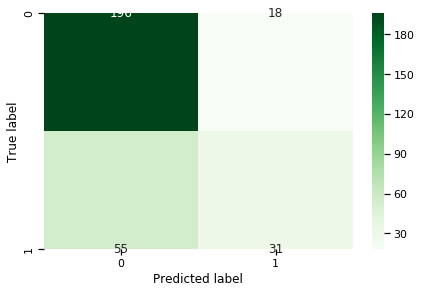

In [406]:
# graphical representation for better understanding.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix,cmap = 'Greens', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Q6 Show the list of the features importance( 1 Marks)

In [407]:
from matplotlib import pyplot
print(rfcl.feature_importances_)

[0.07185848 0.10156461 0.03804146 0.03252179 0.07735615 0.01668824
 0.01131967 0.00925555 0.01649653 0.0048001  0.02722776 0.00740406
 0.02754906 0.00892838 0.01442137 0.01169032 0.00546793 0.01080692
 0.01786873 0.01098922 0.01367003 0.00457699 0.00133353 0.01334742
 0.00181093 0.0009385  0.00826888 0.01836352 0.00931308 0.00578086
 0.01375401 0.01352607 0.01348816 0.01497862 0.01364985 0.00734864
 0.0139641  0.00596052 0.0076271  0.01525506 0.0074544  0.00855709
 0.01058914 0.01325829 0.01423244 0.01549227 0.00947514 0.01375042
 0.01875575 0.00753739 0.00913799 0.01698383 0.0048421  0.02939936
 0.00646116 0.01242075 0.01087947 0.01195964 0.01455072 0.00173944
 0.01102677 0.01350718 0.01346484 0.00255212 0.0027601 ]


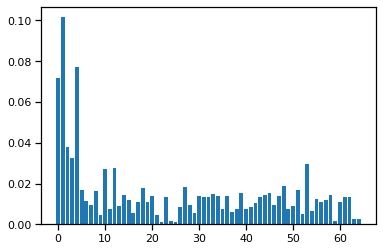

In [408]:
pyplot.bar(range(len(rfcl.feature_importances_)), rfcl.feature_importances_)
pyplot.show()

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [409]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [443]:
from sklearn.model_selection import cross_validate

In [444]:
# Use below values
num_folds = 10
seed = 77

In [445]:
#Validate the Random Forest model build above using k fold

In [446]:
df_result = pd.DataFrame(columns = ['Model', 'Accuracy', 'Scaled Accuracy'])
X=np.array(feature_set)
Y=np.array(target_set)
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
    cv_results = model_selection.cross_val_score(model, feature_set, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    df_result = df_result.append({'Model': name, 'Accuracy': cv_results.mean()}, ignore_index=True) 
    print(msg)


NB: 0.729000 (0.042767)
LR: 0.745000 (0.052393)
KNN: 0.662000 (0.055642)
DT: 0.681000 (0.028792)


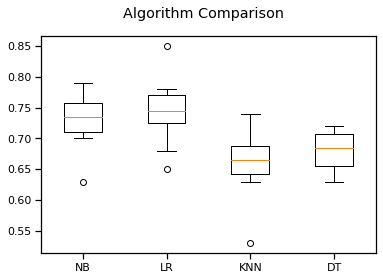

In [447]:
# boxplot comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [448]:
#Calculate Mean score

In [449]:
results = model_selection.cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f" % (results.mean()))

Mean Square Error: -0.303


In [450]:
# Calculate score standard deviation using std()

In [451]:
results = model_selection.cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
print("Standard deviation: %.3f" % (results.std()))

Standard deviation: 0.069


# Q8 Print the confusion matrix( 1 Marks)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=30, random_state=None, shuffle=False)
kf.get_n_splits(gercr_df_concat)
for train_index, test_index in kf.split(gercr_df_concat):

    X_train, X_test = gercr_df_concat[train_index], gercr_df_concat[test_index]
    y_train, y_test = classe[train_index], classe[test_index]

    logmodel.fit(X_train, y_train)
    print (confusion_matrix(y_test, logmodel.predict(X_test)))

Confusion Matrix for Naive Bayes Model 

In [453]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Train Score: ", gnb_model.score(X_train , y_train))

#Invoking the GaussianNB classifier function.
Y_predictNB = gnb_model.predict(X_test)
print("Test Score: ", gnb_model.score(X_test , y_test))

Train Score:  0.7571428571428571
Test Score:  0.73


In [454]:
print(metrics.confusion_matrix(y_test, Y_predictNB))

[[166  48]
 [ 33  53]]


Confusion Matrix for Decision Tree Classifier

In [455]:
#Invoking the DT
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
print("Train Score: ", DT_model.score(X_train , y_train))

#Invoking the DT classifier function.
Y_predictDT = DT_model.predict(X_test)
print("Test Score: ", DT_model.score(X_test , y_test))

Train Score:  1.0
Test Score:  0.6966666666666667


In [456]:
print(metrics.confusion_matrix(y_test, Y_predictDT))

[[173  41]
 [ 50  36]]


Confusion matrix for KNN

In [457]:
#Invoking the k nearest neighbour
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
print("Train Score: ", KNN_model.score(X_train , y_train))

#Invoking the k nearest neighbour.
Y_predictKNN = KNN_model.predict(X_test)
print("Test Score: ", KNN_model.score(X_test , y_test))

Train Score:  0.7771428571428571
Test Score:  0.63


In [458]:
print(metrics.confusion_matrix(y_test, Y_predictKNN))

[[170  44]
 [ 67  19]]


Confusion matrix for logistic regression

In [459]:
#Invoking the Logistic Regression.
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
print("Train Score: ", LR_model.score(X_train , y_train))

#Invoking the Logistic Regression function.
Y_predictLR = LR_model.predict(X_test)
print("Test Score: ", LR_model.score(X_test , y_test))

Train Score:  0.8014285714285714
Test Score:  0.7633333333333333


In [460]:
print(metrics.confusion_matrix(y_test, Y_predictLR))

[[188  26]
 [ 45  41]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

Random Forest Classifier

In [461]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       214
           1       0.63      0.36      0.46        86

    accuracy                           0.76       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.74      0.76      0.73       300



Naive Bayes Gaussian

In [462]:
print(classification_report(y_test, Y_predictNB))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       214
           1       0.52      0.62      0.57        86

    accuracy                           0.73       300
   macro avg       0.68      0.70      0.69       300
weighted avg       0.75      0.73      0.74       300



Decision Tree Classifier

In [463]:
print(classification_report(y_test, Y_predictDT))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       214
           1       0.47      0.42      0.44        86

    accuracy                           0.70       300
   macro avg       0.62      0.61      0.62       300
weighted avg       0.69      0.70      0.69       300



KNN Classifier 

In [464]:
print(classification_report(y_test, Y_predictKNN))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       214
           1       0.30      0.22      0.26        86

    accuracy                           0.63       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.60      0.63      0.61       300



Logistic Regression 

In [465]:
print(classification_report(y_test, Y_predictLR))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       214
           1       0.61      0.48      0.54        86

    accuracy                           0.76       300
   macro avg       0.71      0.68      0.69       300
weighted avg       0.75      0.76      0.75       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [466]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [467]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [468]:
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm = RandomForestClassifier(n_estimators = 500, n_jobs=5,criterion="entropy",random_state=1)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [469]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7529999999999999
Standard deviation:  0.010376254944182267


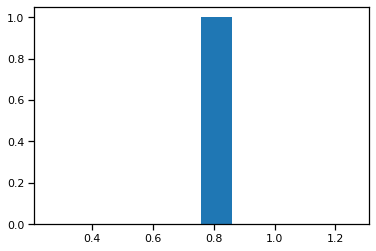

In [470]:
# plot scores
pyplot.hist(acc)
pyplot.show()